# LEVEL - 01  
### TASK - 01


In [1]:
import pandas as pd

data = pd.read_csv('Dataset .csv')

data = data.dropna(subset=['Cuisines'])

totalcuisines = data['Cuisines'].str.split(',').explode().str.strip()

cuisinecounts = totalcuisines.value_counts()

top3 = cuisinecounts.head(3)
print("Top 3 cuisines are:")
for i, (cuisine, _) in enumerate(top3.items(), start=1):
    print(f"{i}. {cuisine}")

print()

Top 3 cuisines are:
1. North Indian
2. Chinese
3. Fast Food



In [2]:
total_res = data.shape[0]

print("Percentage of restaurants that serve each of the top:")

percentages = (top3 / total_res) * 100


for i, (cuisine, count, percentage) in enumerate(zip(top3.index, top3.values, percentages), start=1):
    print(f"{i}. {cuisine}: {count}: {percentage:.2f}%")

Percentage of restaurants that serve each of the top:
1. North Indian: 3960: 41.50%
2. Chinese: 2735: 28.66%
3. Fast Food: 1986: 20.81%


### TASK - 02

In [3]:
import pandas as pd

set1 = pd.read_csv('Dataset .csv')

countcity = set1['City'].value_counts()
print("The city with the highest number of restaurants in the dataset is:", countcity.idxmax())
# print(countcity.idxmax())
print()

The city with the highest number of restaurants in the dataset is: New Delhi



In [4]:
avg = set1.groupby('City')['Aggregate rating'].mean()

with open('average_ratings_by_city.txt', 'w', encoding='utf-8') as f:
    f.write("Average rating for restaurants in each city:\n\n")
    f.write(avg.to_string())

print("The average ratings have been saved to 'average_ratings_by_city.txt'")



The average ratings have been saved to 'average_ratings_by_city.txt'


In [5]:
print(" The city with the highestaverage rating is:",avg.idxmax())

 The city with the highestaverage rating is: Inner City


### TASK - 03

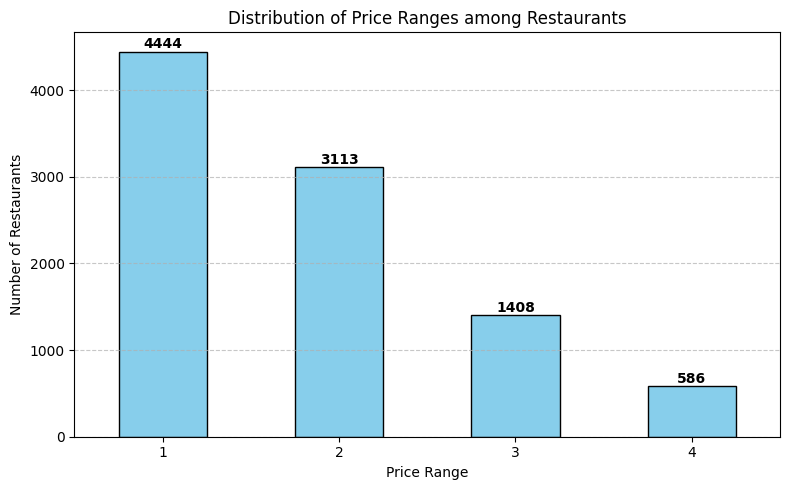

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

set2 = pd.read_csv('Dataset .csv') 

price_counts = set2['Price range'].value_counts().sort_index()


plt.figure(figsize=(8,5))
bars = price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Price Ranges among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,    
        bar.get_height() + 2,                 
        int(bar.get_height()),                
        ha='center', va='bottom',
        fontsize=10, fontweight='bold', color='black'
    )

plt.tight_layout()
plt.show()

In [7]:
total_res = set2.shape[0]
percentages = (price_counts / total_res) * 100
print("The percentage of restaurantsin each price range category is:", percentages)

The percentage of restaurantsin each price range category is: Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


### TASK - 04

In [8]:

import pandas as pd

set3= pd.read_csv('Dataset .csv')

onlinedelivery= set3['Has Online delivery'].value_counts()  
a=set3.shape[0]
percentages = (onlinedelivery / a) * 100
print("The percentage of restaurants that offer online delivery is:\n", percentages.index[1], "--->", percentages.values[1].round(2), "%")

The percentage of restaurants that offer online delivery is:
 Yes ---> 25.66 %


In [9]:
avgrating= set3.groupby('Has Online delivery')['Aggregate rating'].mean()
print("The average rating for restaurants that offer online delivery is:\n", avgrating.index[1], "--->", avgrating.values[1].round(2))
print("The average rating for restaurants that do not offer online delivery is:\n", avgrating.index[0], "--->", avgrating.values[0].round(2))

The average rating for restaurants that offer online delivery is:
 Yes ---> 3.25
The average rating for restaurants that do not offer online delivery is:
 No ---> 2.47


# LEVEL - 02
### TASK - 01


In [10]:
import pandas as pd

set4 = pd.read_csv('Dataset .csv')
agg =set4 ['Aggregate rating'].value_counts()
print("The most common rating range is:",agg.idxmax())

The most common rating range is: 0.0


In [11]:
votes = set4.groupby('Restaurant Name')['Votes'].mean()
with open('average_votes_by_restaurant.txt', 'w', encoding='utf-8') as f:
    f.write("Average votes for each restaurant:\n\n")
    f.write(votes.to_string())
print("The average votes have been saved to 'average_votes_by_restaurant.txt'")

The average votes have been saved to 'average_votes_by_restaurant.txt'


### TASK - 02

In [12]:
import pandas as pd

df = pd.read_csv('Dataset .csv')
cuisine_col = 'Cuisines'

df = df.dropna(subset=[cuisine_col])
if 'Restaurant Name' in df.columns:
    df = df.drop_duplicates(subset=['Restaurant Name', cuisine_col])
def normalize_cuisine_combo(cuisine_str):
    cuisines = [c.strip() for c in cuisine_str.split(',')]
    cuisines.sort()
    return ', '.join(cuisines)

df['CuisineCombo'] = df[cuisine_col].apply(normalize_cuisine_combo)

df['CuisineCount'] = df['CuisineCombo'].apply(lambda x: len(x.split(',')))
multi_cuisine_df = df[df['CuisineCount'] >= 2]
combo_counts = multi_cuisine_df['CuisineCombo'].value_counts()

most_common_combo = combo_counts.idxmax()
most_common_count = combo_counts.max()

print("Most common multi-cuisine combination:")
print(f"{most_common_combo} - {most_common_count} restaurants")

Most common multi-cuisine combination:
Chinese, North Indian - 569 restaurants


In [13]:
import pandas as pd
df = pd.read_csv('Dataset .csv')
cuisine_col = 'Cuisines'
rating_col = 'Aggregate rating'  

df = df.dropna(subset=[cuisine_col, rating_col])
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
df = df.dropna(subset=[rating_col])

def normalize_cuisine_combo(cuisine_str):
    cuisines = [c.strip() for c in cuisine_str.split(',')]
    cuisines.sort()
    return ', '.join(cuisines)

df['CuisineCombo'] = df[cuisine_col].apply(normalize_cuisine_combo)

df['CuisineCount'] = df['CuisineCombo'].apply(lambda x: len(x.split(',')))
df = df[df['CuisineCount'] >= 2]
combo_rating = df.groupby('CuisineCombo')[rating_col].mean().sort_values(ascending=False)

print("Top 10 cuisine combinations by average rating:")
print(combo_rating.head(11))

Top 10 cuisine combinations by average rating:
CuisineCombo
BBQ, Breakfast, Southern           4.9
Bar Food, Burger, Steak            4.9
Bakery, Continental, Italian       4.9
American, Coffee and Tea           4.9
American, Healthy Food, Mexican    4.9
Indonesian, Sunda                  4.9
Contemporary, European             4.9
Asian, European, Indian            4.9
Deli, Italian                      4.9
American, Sandwich, Tea            4.9
European, German                   4.9
Name: Aggregate rating, dtype: float64


### TASK - 03

In [14]:

import pandas as pd
import folium
df = pd.read_csv('Dataset .csv')
df = df.dropna(subset=['Latitude', 'Longitude'])

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row.get('Restaurant Name', 'Restaurant')
    ).add_to(restaurant_map)
restaurant_map.save("restaurant_locations_map.html")
print("Map saved as restaurant_locations_map.html")

Map saved as restaurant_locations_map.html


In [15]:
import pandas as pd
import folium
from sklearn.cluster import KMeans

df = df.dropna(subset=['Latitude', 'Longitude'])
kmeans = KMeans(n_clusters=5, random_state=0)

coordinates = df[['Latitude', 'Longitude']]
df['Cluster'] = kmeans.fit_predict(coordinates)

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

colors = ['red', 'blue', 'green', 'purple', 'orange']
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row.get('Restaurant Name', 'Restaurant'),
        icon=folium.Icon(color=colors[row['Cluster']])
    ).add_to(restaurant_map)

restaurant_map.save("restaurant_clusters_map.html")
print("Map with clusters saved as restaurant_clusters_map.html")

Map with clusters saved as restaurant_clusters_map.html


### TASK - 04

In [16]:
import pandas as pd

df = pd.read_csv('Dataset .csv')

df = df.dropna(subset=['Restaurant Name', 'Latitude', 'Longitude'])
chain_check = df.groupby('Restaurant Name')[['Latitude', 'Longitude']].nunique()
chains = chain_check[(chain_check['Latitude'] > 1) | (chain_check['Longitude'] > 1)]
with open('Restaurant chains.txt', 'w', encoding='utf-8') as f:
    f.write("Restaurant chains present in the dataset:\n\n")
    f.write(chains.to_string())
print("The restaurant chains have been saved to 'Restaurant chains.txt'")


The restaurant chains have been saved to 'Restaurant chains.txt'


In [17]:
import pandas as pd

df = pd.read_csv('Dataset .csv')
df = df.dropna(subset=['Restaurant Name', 'Latitude', 'Longitude', 'Aggregate rating', 'Votes'])
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df = df.dropna(subset=['Aggregate rating', 'Votes'])

loc_count = df.groupby('Restaurant Name')[['Latitude', 'Longitude']].nunique()
chains = loc_count[(loc_count['Latitude'] > 1) | (loc_count['Longitude'] > 1)].index

chain_data = df[df['Restaurant Name'].isin(chains)]
chain_summary = chain_data.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).sort_values(by='Votes', ascending=False)
chain_summary = chain_summary.rename(columns={
    'Aggregate rating': 'Average Rating',
    'Votes': 'Total Votes'
})

with open('Ratings & popularity-Diff restaurant chains.txt', 'w', encoding='utf-8') as f:
    f.write("Ratings and popularity of different restaurant chains:\n\n")
    f.write(chain_summary.to_string())
print("The ratings and popularity of different restaurant chains have been saved to 'Ratings & popularity-Diff restaurant chains.txt'")

The ratings and popularity of different restaurant chains have been saved to 'Ratings & popularity-Diff restaurant chains.txt'


# LEVEL -03
### TASK -01

In [18]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
df = pd.read_csv('Dataset .csv')
review_col = 'Rating text'

df = df.dropna(subset=[review_col])

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    return text.lower()

df['Cleaned'] = df[review_col].apply(clean_text)
sia = SentimentIntensityAnalyzer()
positive_phrases = []
negative_phrases = []

for review in df['Cleaned']:
    score = sia.polarity_scores(review)['compound']
    if score >= 0.5:
        positive_phrases.append(review)
    elif score <= -0.5:
        negative_phrases.append(review)

stop_words = set(stopwords.words('english'))

def extract_keywords(phrases):
    words = []
    for phrase in phrases:
        tokens = [word for word in phrase.split() if word not in stop_words]
        words.extend(tokens)
    return Counter(words).most_common(10)
top_positive = extract_keywords(positive_phrases)
top_negative = extract_keywords(negative_phrases)
print("🔵 Top Positive Keywords:")
for word, freq in top_positive:
    print(f"{word}: {freq}")

print("\n🔴 Top Negative Keywords:")
for word, freq in top_negative:
    print(f"{word}: {freq}")


🔵 Top Positive Keywords:
excellent: 301

🔴 Top Negative Keywords:


In [19]:
import pandas as pd

df = pd.read_csv('Dataset .csv')
review_col = 'Rating text'          
rating_col = 'Aggregate rating' 

df = df.dropna(subset=[review_col, rating_col])
df['ReviewLength'] = df[review_col].astype(str).apply(lambda x: len(x.split()))
average_length = df['ReviewLength'].mean()
print(" \n Average review length (in words):", round(average_length, 2))
correlation = df['ReviewLength'].corr(df[rating_col])
print("Correlation between review length and rating:", round(correlation, 3))





 
 Average review length (in words): 1.34
Correlation between review length and rating: -0.6


### TASK - 02

In [20]:
import pandas as pd

df = pd.read_csv('Dataset .csv')

votes_col = 'Votes'
name_col = 'Restaurant Name'  # Change if different

df[votes_col] = df[votes_col].astype(str).str.replace(',', '').str.strip()
df[votes_col] = pd.to_numeric(df[votes_col], errors='coerce')

df = df.dropna(subset=[votes_col])
print("Max Votes Found:", df[votes_col].max())
print("Min Votes Found:", df[votes_col].min())

max_votes = df[votes_col].max()
min_votes = df[votes_col].min()

highest_voted = df[df[votes_col] == max_votes][[name_col, votes_col]]
lowest_voted = df[df[votes_col] == min_votes][[name_col, votes_col]]

print("\n🏆 Restaurants with the Highest Votes:")
print(highest_voted.to_string(index=False))

print("\n⚠️ Restaurants with the Lowest Votes:")
print(lowest_voted.to_string(index=False))


Max Votes Found: 10934
Min Votes Found: 0

🏆 Restaurants with the Highest Votes:
Restaurant Name  Votes
           Toit  10934

⚠️ Restaurants with the Lowest Votes:
                            Restaurant Name  Votes
                           Cantinho da Gula      0
                              The Chaiwalas      0
                         Fusion Food Corner      0
                              Punjabi Rasoi      0
                              Baskin Robbin      0
                                     Angaar      0
                                      TcozY      0
                              The Retriever      0
                             Chill 'N Grill      0
                         Punjabi Restaurant      0
                     Standard Chicken Point      0
                         The Grillz & Gravy      0
                                Little Cafe      0
                                    Giani's      0
                                New Dilight      0
                  

In [21]:
import pandas as pd

df = pd.read_csv('Dataset .csv')

df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

df = df.dropna(subset=['Votes', 'Aggregate rating'])

correlation = df['Votes'].corr(df['Aggregate rating'])
print("Correlation between number of votes and rating:", correlation)


Correlation between number of votes and rating: 0.31369058419541146


### TASK - 03

In [22]:
import pandas as pd

df = pd.read_csv('Dataset .csv')

df.columns = df.columns.str.strip()

df = df.dropna(subset=['Price range', 'Has Online delivery', 'Has Table booking'])
df['Has Online delivery'] = df['Has Online delivery'].str.strip().str.lower()
df['Has Table booking'] = df['Has Table booking'].str.strip().str.lower()
delivery_stats = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100
booking_stats = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack().fillna(0) * 100
print("🔸 Has Online Delivery % by Price range:\n")
print(delivery_stats.round(2))

print("\n🔸 Has Table Booking % by Price range:\n")
print(booking_stats.round(2))


🔸 Has Online Delivery % by Price range:

Has Online delivery     no    yes
Price range                      
1                    84.23  15.77
2                    58.69  41.31
3                    70.81  29.19
4                    90.96   9.04

🔸 Has Table Booking % by Price range:

Has Table booking     no    yes
Price range                    
1                  99.98   0.02
2                  92.32   7.68
3                  54.26  45.74
4                  53.24  46.76


In [23]:
import pandas as pd

df = pd.read_csv('Dataset .csv')

df.columns = df.columns.str.strip()
df = df.dropna(subset=['Price range', 'Has Online delivery', 'Has Table booking'])

df['Has Online delivery'] = df['Has Online delivery'].str.strip().str.lower()
df['Has Table booking'] = df['Has Table booking'].str.strip().str.lower()
df['Online_Delivery_Binary'] = df['Has Online delivery'].map({'yes': 1, 'no': 0})
df['Table_Booking_Binary'] = df['Has Table booking'].map({'yes': 1, 'no': 0})

result = df.groupby('Price range')[['Online_Delivery_Binary', 'Table_Booking_Binary']].mean() * 100
result = result.round(2)
print("🔍 Availability % of Online Delivery & Table Booking by Price Range:\n")
print(result)

correlation_online = df['Price range'].corr(df['Online_Delivery_Binary'])
correlation_table = df['Price range'].corr(df['Table_Booking_Binary'])

print("\n📊 Correlation between Price Range and Online Delivery Availability:", round(correlation_online, 2))
print("📊 Correlation between Price Range and Table Booking Availability:", round(correlation_table, 2))


🔍 Availability % of Online Delivery & Table Booking by Price Range:

             Online_Delivery_Binary  Table_Booking_Binary
Price range                                              
1                             15.77                  0.02
2                             41.31                  7.68
3                             29.19                 45.74
4                              9.04                 46.76

📊 Correlation between Price Range and Online Delivery Availability: 0.08
📊 Correlation between Price Range and Table Booking Availability: 0.5


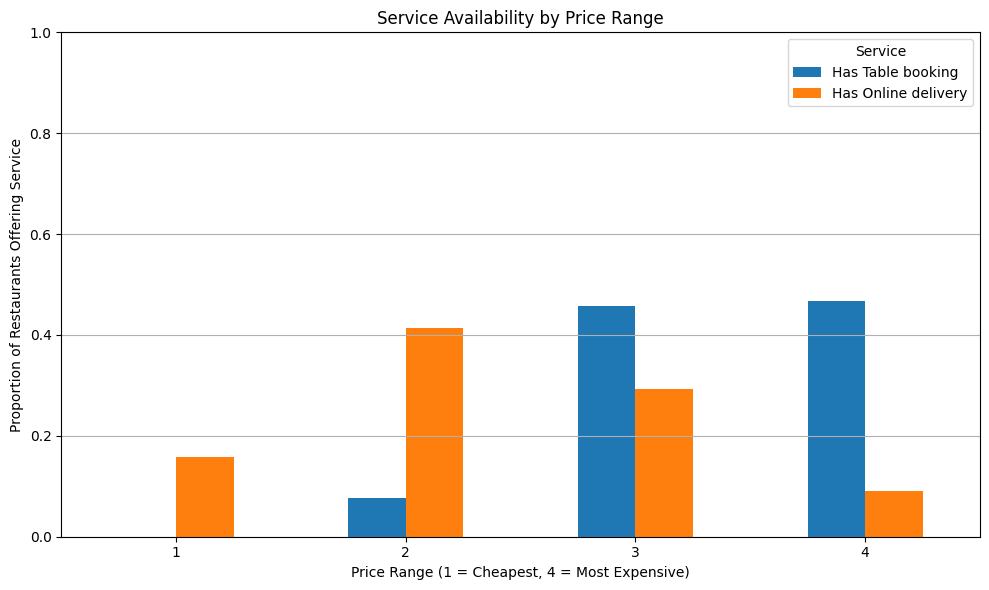

In [24]:
import matplotlib.pyplot as plt

df = pd.read_csv('Dataset .csv')

df.columns = df.columns.str.strip()
services = ['Has Table booking', 'Has Online delivery']
for col in services:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
service_availability = df.groupby('Price range')[services].mean()
service_availability.plot(kind='bar', figsize=(10, 6))
plt.title("Service Availability by Price Range")
plt.ylabel("Proportion of Restaurants Offering Service")
plt.xlabel("Price Range (1 = Cheapest, 4 = Most Expensive)")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title="Service")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
